<a href="https://colab.research.google.com/github/Shashank1202/Kaggle_playground/blob/main/kaggle22_NetflixIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref=zipfile.ZipFile('/content/archive (17).zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r'/content/Netflix TV Shows and Movies.csv')
df.head(10)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
5,5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
6,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
7,7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,tt0080453,5.8,69053.0
8,8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,tt0061418,7.7,111189.0
9,9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [12]:
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [13]:
df.shape

(5283, 11)

In [14]:
df.head(1)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0


In [15]:
df.drop(['id', 'index', 'imdb_id'], axis=1, inplace = True)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5283 non-null   object 
 1   type               5283 non-null   object 
 2   description        5278 non-null   object 
 3   release_year       5283 non-null   int64  
 4   age_certification  2998 non-null   object 
 5   runtime            5283 non-null   int64  
 6   imdb_score         5283 non-null   float64
 7   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 330.3+ KB


In [17]:
df.isna().sum()

title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [18]:
df["age_certification"] = df["age_certification"].fillna(method='ffill')
df["imdb_votes"] = df["imdb_votes"].fillna(method='ffill')

In [19]:
# 1. What is the total number of entries in the dataset, and how many unique titles are present?
print(f"There are total of {df.shape[0]} entries in the dataset; and {len(df['title'].unique())} unqiue titles.")

There are total of 5283 entries in the dataset; and 5237 unqiue titles.


In [20]:
# 2. What are the data types of each column in the dataset, and are there any missing values? If yes, how would you handle them?
df.isna().sum()
df["age_certification"] = df["age_certification"].fillna(method='ffill')
df["imdb_votes"] = df["imdb_votes"].fillna(method='ffill')

In [21]:
# 3. What is the range of release years for the movies and shows,
# and can you identify any patterns or trends in the distribution of release years?
df['release_year'].describe()

count    5283.000000
mean     2015.879992
std         7.346098
min      1953.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

<Axes: xlabel='release_year', ylabel='Count'>

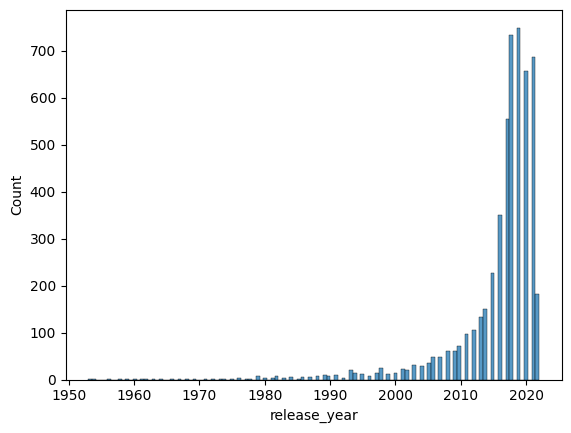

In [22]:
import seaborn as sns
sns.histplot(data = df, x='release_year')
# answer from graph: between 2010 to 2020 the titles produced increased drastically, thanks to technology development

In [23]:
# 4. What is the average IMDb score for the movies and shows, and can you identify the top 3 movies with the highest IMDb scores?
avg_movie_score = df[df["type"]=="MOVIE"]["imdb_score"].mean()
avg_show_score = df[df["type"]=="SHOW"]["imdb_score"].mean()
print(f"Average imdb score for movies, shows is {avg_movie_score} and {avg_show_score} respectively.\n")

print("Below are the top 3 movies with highest imdb score:")
df[df["type"]=="MOVIE"].sort_values(by="imdb_score", ascending=False)[:3]

Average imdb score for movies, shows is 6.266979747578516 and 7.017377398720683 respectively.

Below are the top 3 movies with highest imdb score:


,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
3172,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,9.0,31180.0
2685,C/o Kancharapalem,MOVIE,From a schoolboyâ€™s crush to a middle-aged ba...,2018,PG,152,9.0,6562.0
24,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,R,235,9.0,943.0


Avg runtime of movies, shows is 101.53742295274435, 38.63272921108742 minutes respectively.



<Axes: >

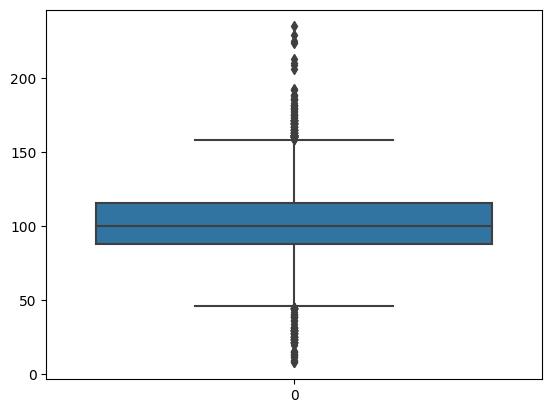

In [25]:
# 5. How does the distribution of movie runtimes look, and are there any outliers?
# Also, compare the average runtime of movies with the average runtime of TV shows.

avg_movies_runtime = df[df["type"]=="MOVIE"]["runtime"].mean()
avg_show_runtime = df[df["type"]=="SHOW"]["runtime"].mean()
print(f"Avg runtime of movies, shows is {avg_movies_runtime}, {avg_show_runtime} minutes respectively.\n")

sns.boxplot(df[df["type"]=="MOVIE"]["runtime"])

In [26]:
# 6. What are the unique age certifications present in the dataset,
# and can you identify any relationship between IMDb score and age certification?
df["age_certification"].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'NC-17'], dtype=object)

<Axes: xlabel='age_certification', ylabel='imdb_score'>

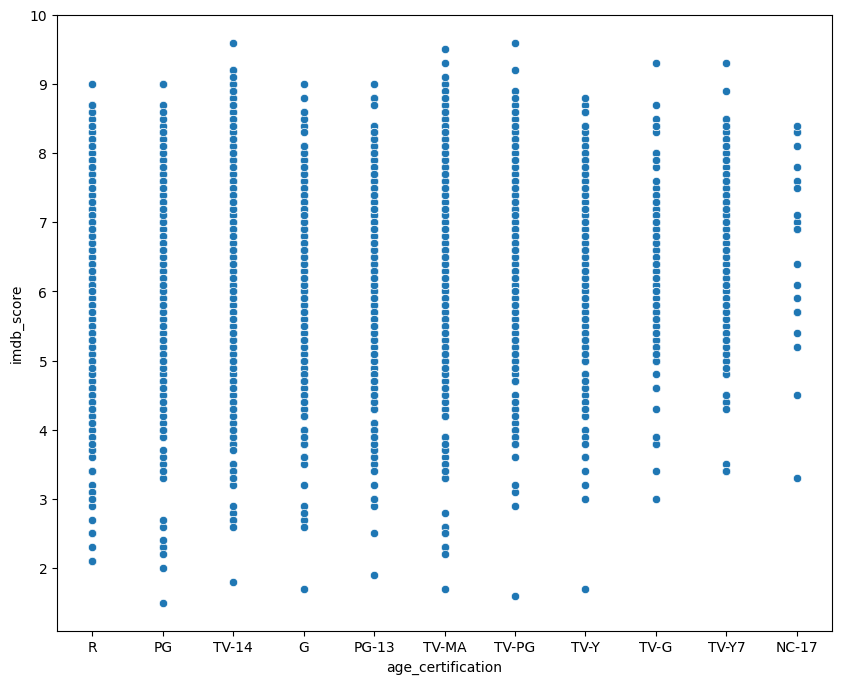

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.scatterplot(data =df, x='age_certification', y='imdb_score')

# answer: the highest imdb scores went to tv-14 and tv-ma rating. The lowest went to pg rating. The ratings on TV-MA are wisespread

<Axes: xlabel='imdb_score', ylabel='Count'>

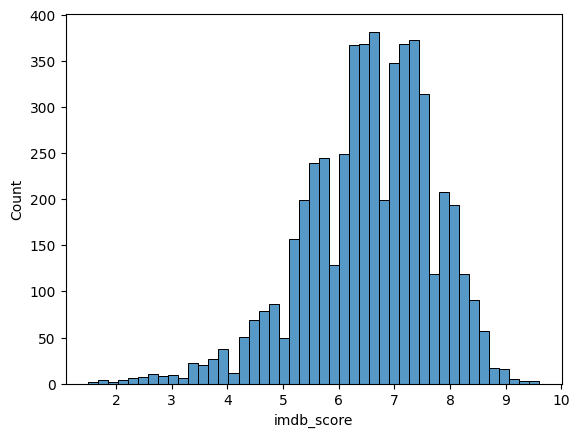

In [28]:
# 7. Analyze the distribution of IMDb votes,
# and investigate if there is a correlation between the number of IMDb votes and the IMDb score.

sns.histplot(data = df, x='imdb_score')
# answer1: most imdb rating is between 6 to 7 range

<Axes: >

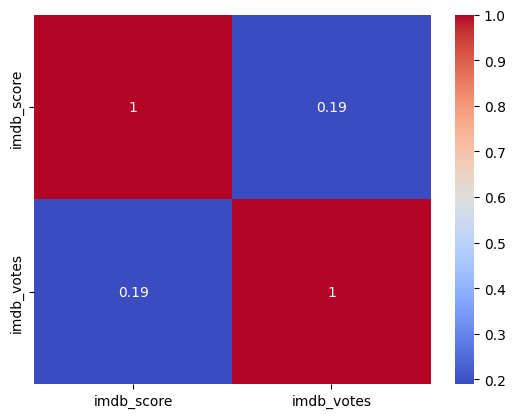

In [29]:
df_temp = df[["imdb_score", "imdb_votes"]]
sns.heatmap( df_temp.corr(), cmap='coolwarm', annot=True)
# answer2: the correlation between them is 0.19, which is a weak positive corelation

<Axes: xlabel='release_year', ylabel='imdb_score'>

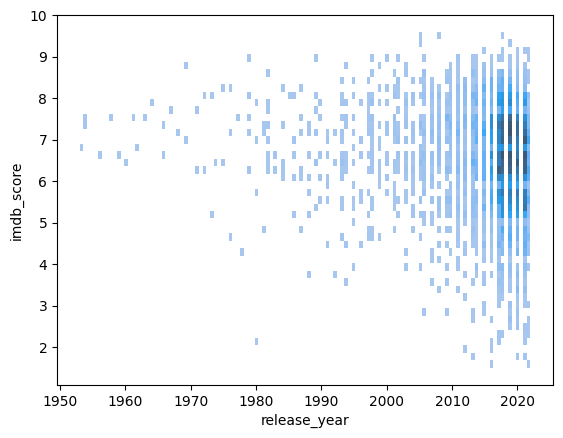

In [30]:
# 9. Are there any noticeable trends in IMDb scores over the years, and how would you visualize the popularity of movies and shows over time?

sns.histplot(data=df, x='release_year', y='imdb_score')
# answer1: from the graph we can see that there are more imdb ratings recently. The reduction of gadgets cost because of mass -production,
# the availability of internet explains this higher number of the imdb ratings in the recent years.

<Axes: xlabel='release_year'>

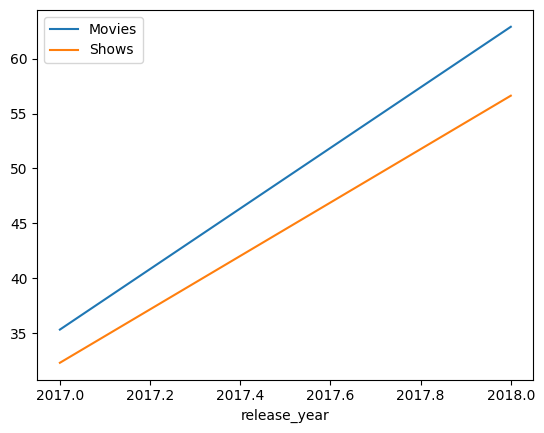

In [31]:
# Visualize the popularity of movies and shows over time
sns.lineplot(data=df, x='release_year', y=df[df['type'] == 'MOVIE'].groupby('release_year').size(), label='Movies',errorbar=None)
sns.lineplot(data=df, x='release_year', y=df[df['type'] == 'SHOW'].groupby('release_year').size(), label='Shows',errorbar=None)

<Axes: title={'center': 'Shows'}, xlabel='runtime', ylabel='imdb_score'>

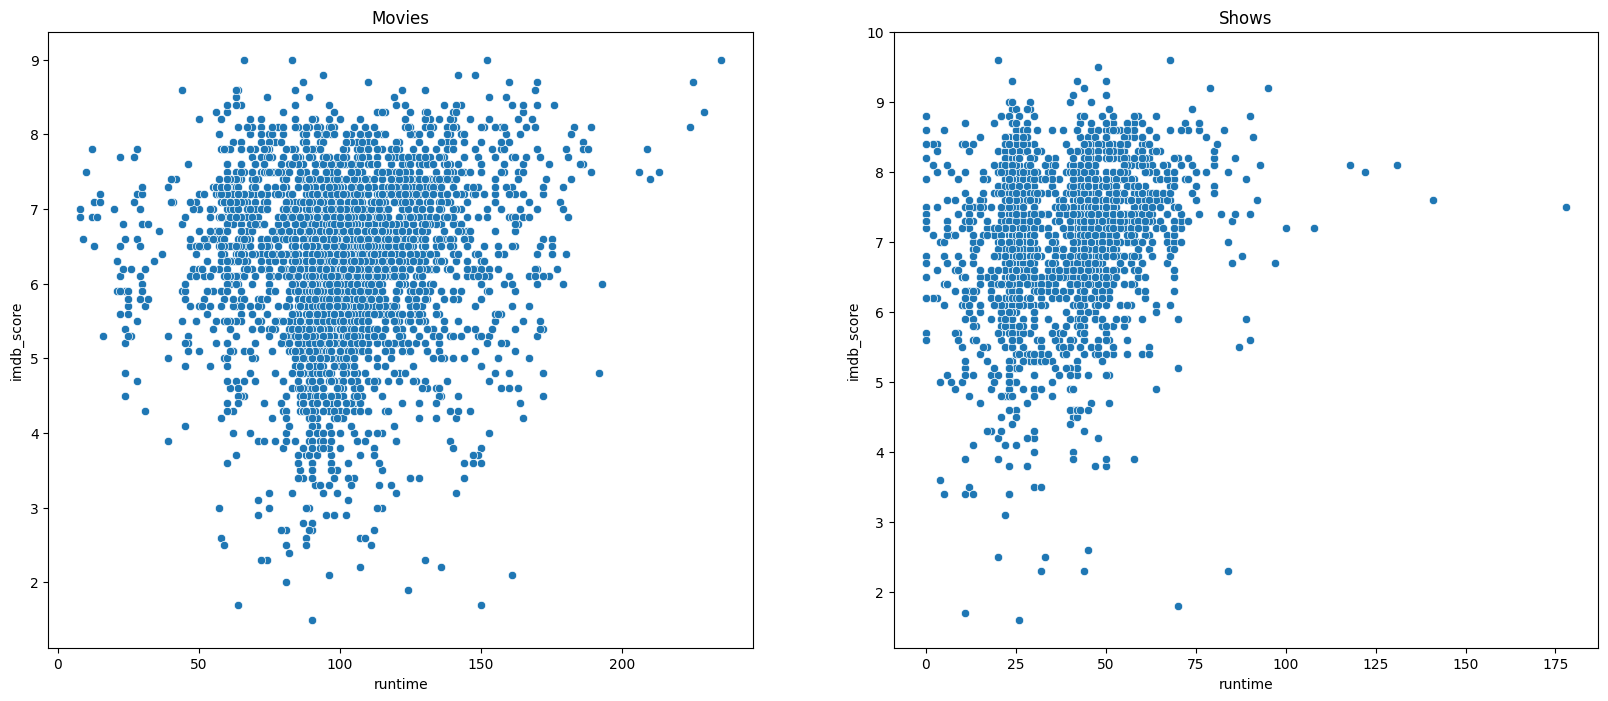

In [32]:
# 10. Analyze IMDb votes and runtime together to identify patterns in user engagement.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
axes[0].set_title("Movies")
axes[1].set_title("Shows")
sns.scatterplot(data = df[df["type"]=="MOVIE"], x='runtime', y='imdb_score', ax =axes[0])
sns.scatterplot(data = df[df["type"]=="SHOW"], x='runtime', y='imdb_score', ax=axes[1])


# answer: from the graph, movies that gave nearly 50 to 100 minutes of runtime has 4 and above imdb_score
# while for shows, the runtimes of (episodes) that are around 25 minutes and 50 minutes are having higher imdb scores

<Axes: xlabel='age_certification', ylabel='release_year'>

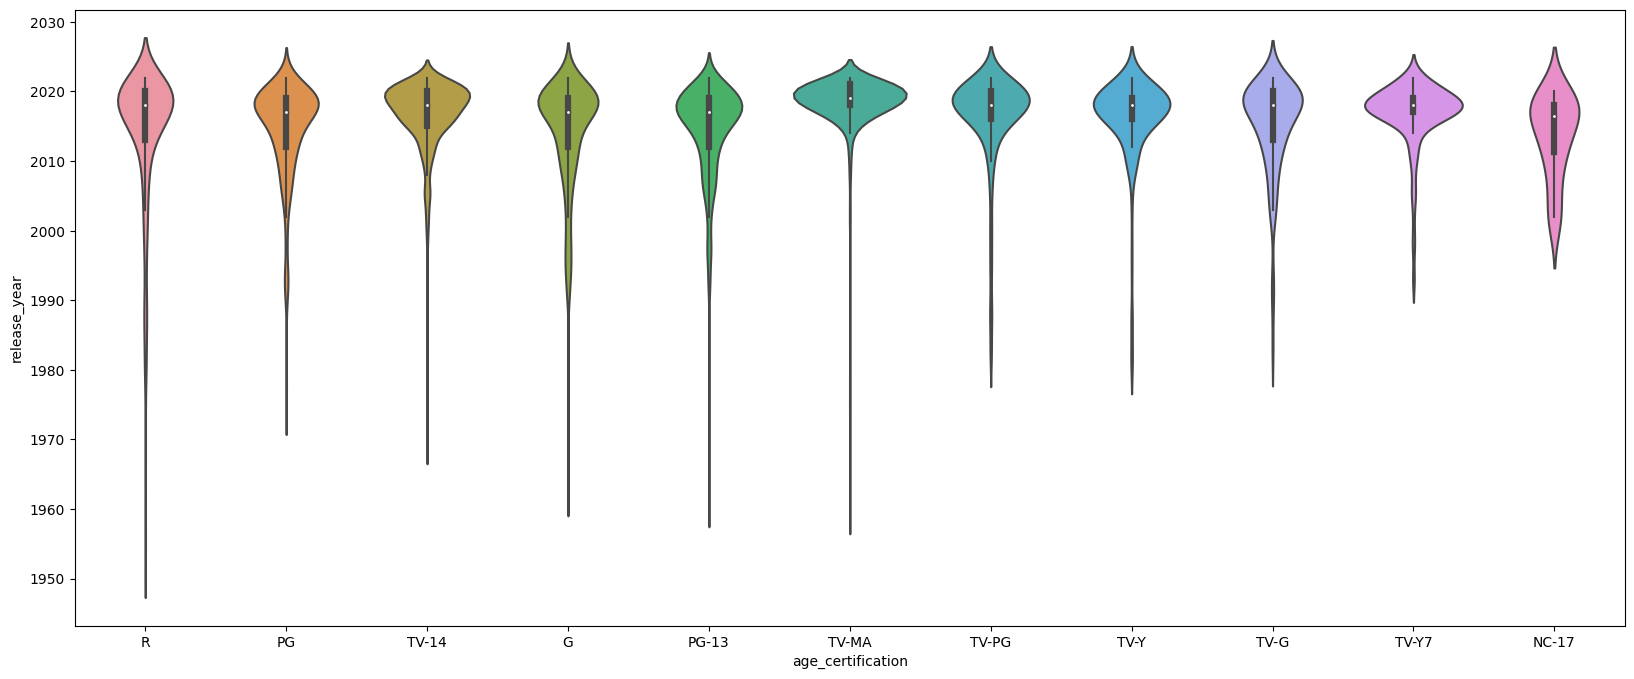

In [33]:
# 11. Explore the trend of each age_rating over the years and explain the reasons.
plt.figure(figsize=(20,8))
sns.violinplot(data = df, x='age_certification', y='release_year')

# answer: from the graph, the most of the rating of TV's started lately, because of tech advancements in recent years I assume.
# the rating of R has been for so long. And latelty TV ratings like TV-MA and TV-Y7 have increased because of companies focus on shows

In [ ]:
-